This notebook will explore how optimal entry points might cluster when taking different indicators into account.


In [1]:
import os
os.chdir('../../')
os.getcwd()

&#39;/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing&#39;

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from v2.model import Trading
from v2.strategy.indicators.smma import SMMA
from v2.strategy.indicators.stochastic_oscillator import StochasticOscillator
from v2.strategy.indicators.bollinger_bands import BollingerBands
from v2.strategy.indicators.rsi import RSI
from v2.strategy.indicators.macd import MACD
from v2.strategy.indicators.param import Param



In [4]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())

In [5]:
datasets = model.dfs
appended_dataset = pd.DataFrame()
for d in datasets:
    training_set = d[0]
    training_set['trough'] = training_set.iloc[argrelextrema(training_set.close.values, np.less_equal, order=480)[0]]['close']
    training_set['peak'] = training_set.iloc[argrelextrema(training_set.close.values, np.greater_equal, order=480)[0]]['close']
    ema_fast = Param(5, 10000, 0, 'ema_fast', 60)
    ema_slow= Param(6, 10001, 0, 'ema_slow', 120)
    signal = Param(5, 10001, 0, 'signal', 90)
    macd_ = MACD(_params=[ema_fast, ema_slow, signal], _name='macd')
    macd_.genData(training_set, gen_new_values=False)
    boll_period = Param(5, 10000, 0, 'period', 90)
    boll_bands = BollingerBands(_params=[boll_period], _name='bollinger_bands')
    boll_bands.genData(training_set, gen_new_values=False)
    stoch_highlow = Param(5, 10000, 0, 'highlow_range', 90.0)
    stoch_k = Param(5, 10000, 0, 'k_period', 270.0)
    stoch_oscillator = StochasticOscillator(_params=[stoch_highlow, stoch_k], _name='stochastic_oscillator')
    stoch_oscillator.genData(training_set, gen_new_values=False)
    rsi_period = Param(5, 10000, 0, 'period', 90.0)
    rsi_ = RSI(_params=[rsi_period], _name='rsi')
    rsi_.genData(training_set, gen_new_values=False)
    smma_period = Param(5, 10000, 0, 'period', 90.0)
    smma_ = SMMA(_params=[smma_period], _name='smma')
    smma_.genData(training_set, gen_new_values=False)
    training_set[['trough', 'peak']] = training_set[['trough', 'peak']].fillna(0)
    training_set['slope'] = (training_set['close'].rolling(window=30).max() - training_set['close'].rolling(window=30).min()) / training_set['close'].rolling(window=30).max()
    training_set = training_set.dropna()
    appended_dataset = appended_dataset.append(training_set)


    

In [24]:
appended_dataset

,time,open,high,low,close,volume,trades,ema_slow,ema_fast,macd,...,rsi_diff,rsi_u,rsi_d,rsi_smma_u,rsi_smma_d,rsi,slope,trough,peak,smma
2315395,1577879940,130.91,130.91,130.91,130.91,0.483000,1,130.792735,130.882530,0.089795,...,0.24,0.24,0.00,0.018699,0.015899,54.046807,0.008518,0.0,0.0,130.677065
2315396,1577880000,130.76,130.76,130.76,130.76,0.215000,1,130.792194,130.878513,0.086319,...,-0.15,0.00,0.15,0.018487,0.017416,51.491651,0.008518,0.0,0.0,130.678003
2315397,1577880060,130.89,130.89,130.89,130.89,3.785000,1,130.793810,130.878889,0.085079,...,0.13,0.13,0.00,0.019749,0.017219,53.421560,0.008217,0.0,0.0,130.680401
2315398,1577880120,130.89,130.89,130.89,130.89,1.535946,1,130.795400,130.879254,0.083853,...,0.00,0.00,0.00,0.019526,0.017024,53.421560,0.008217,0.0,0.0,130.682771
2315399,1577880180,130.88,130.88,130.88,130.88,1.160000,1,130.796799,130.879278,0.082480,...,-0.01,0.00,0.01,0.019305,0.016945,53.254896,0.007235,0.0,0.0,130.685002
2315400,1577880240,130.90,130.90,130.90,130.90,4.800000,1,130.798504,130.879958,0.081453,...,0.02,0.02,0.00,0.019313,0.016753,53.547994,0.006705,0.0,0.0,130.687432
2315401,1577880300,130.90,130.90,130.90,130.90,4.720000,1,130.800182,130.880615,0.080433,...,0.00,0.00,0.00,0.019094,0.016564,53.547994,0.006705,0.0,0.0,130.689835
2315402,1577880360,130.91,130.91,130.91,130.91,4.320000,1,130.801997,130.881578,0.079581,...,0.01,0.01,0.00,0.018992,0.016377,53.696438,0.006705,0.0,0.0,130.692323
2315403,1577880420,130.86,130.86,130.86,130.86,0.076408,1,130.802956,130.880871,0.077915,...,-0.05,0.00,0.05,0.018777,0.016757,52.842616,0.006705,0.0,0.0,130.694217
2315404,1577880480,130.99,130.99,130.99,130.99,0.519900,1,130.806048,130.884449,0.078401,...,0.13,0.13,0.00,0.020034,0.016567,54.735005,0.006705,0.0,0.0,130.697558


In [12]:
from sklearn.neural_network import MLPClassifier




In [7]:
clf = RandomForestClassifier(random_state=69420, max_features=None, criterion='gini', n_estimators=5, n_jobs=-1, min_samples_leaf=1)
# clf = MLPClassifier(random_state=69420, activation='tanh', shuffle=True)

trough_input_data = appended_dataset[['stosc_k', 'slope', 'macd_diff', 'rsi']]

is_trough = appended_dataset['trough'].gt(0).astype(int)
clf.fit(trough_input_data, is_trough)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=&#39;gini&#39;, max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=69420, verbose=0,
                       warm_start=False)

In [8]:
clf_2 = RandomForestClassifier(random_state=69420, max_features=None, criterion='entropy', n_estimators=9, n_jobs=-1)
peak_input_data = appended_dataset[['boll_lower', 'boll_upper', 'rsi']]
is_peak = appended_dataset['peak'].gt(0).astype(int)
clf_2.fit(peak_input_data, is_peak)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=&#39;entropy&#39;, max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=-1,
                       oob_score=False, random_state=69420, verbose=0,
                       warm_start=False)

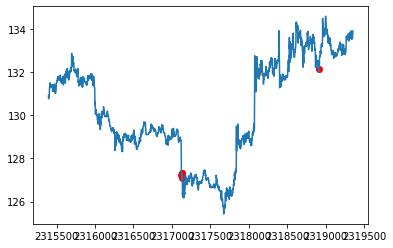

In [9]:
model = Trading(load_config())
datasets = model.dfs
test_data = datasets[0][0]


macd_.genData(test_data, gen_new_values=False)

boll_bands.genData(test_data, gen_new_values=False)

stoch_oscillator.genData(test_data, gen_new_values=False)

rsi_.genData(test_data, gen_new_values=False)
test_data['slope'] = (test_data['close'].rolling(window=10).max() - test_data['close'].rolling(window=10).min()) / test_data['close'].rolling(window=10).max()
test_data = test_data.dropna()

new_input_data_trough = test_data[['stosc_k', 'slope', 'macd_diff', 'rsi']]
new_input_data_peak = test_data[['boll_lower', 'boll_upper', 'rsi']]

test_data['predictions_trough'] = clf.predict(new_input_data_trough)
test_data['predictions_peak'] = clf_2.predict(new_input_data_peak)
def insert_predictions(close, prediction):
    if prediction:
        return close
    else:
        return None
test_data['predictions_trough'] = test_data.apply(lambda row: insert_predictions(row['close'], row['predictions_trough']), axis=1)

test_data['predictions_peak'] = test_data.apply(lambda row: insert_predictions(row['close'], row['predictions_peak']), axis=1)
plt.scatter(test_data.index, test_data['predictions_trough'], c='r')
plt.scatter(test_data.index, test_data['predictions_peak'], c='orange')
plt.plot(test_data.index, test_data['close'])
plt.show()


In [27]:
import pickle


In [29]:
pickle.dump(clf, open('troughs_v3.sav', 'wb'))
pickle.dump(clf, open('peaks_v3.sav', 'wb'))